In [1]:
import pandas as pd
from pandas_datareader import data
# import yfinance as yf
# pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random

import torch
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# pd.options.mode.chained_assignment = None
# import seaborn as sns
from tqdm import tqdm

c:\Program Files\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# GOOGL

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'  # '2014-01-01'  # 2012-10-21
end_date = '2022-11-22'  # '2014-10-20'  # 2022

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('IBM', 'yahoo', start_date, end_date)

# Resample the data to normalize it, the data comes without any data on the (days that the markets are close, weekends)
panel_data = panel_data.resample("D").max()

# Fill the data in the closed markets with the data from the previous trading day, because it is their true value
panel_data = panel_data.fillna(method="ffill")

panel_data[panel_data.index.name] = panel_data.index
panel_data.index.name = None
panel_data = panel_data[['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]
panel_data.reset_index(drop=True, inplace=True)

panel_data.head(20)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,110.898659,106.955070,107.492828,110.898659,10823694.0,64.057053
1,2000-01-04,109.464630,105.999046,108.986618,107.134323,8606279.0,61.882660
2,2000-01-05,114.483749,107.194077,107.970840,110.898659,13318927.0,64.057053
3,2000-01-06,113.706978,108.508606,112.810707,108.986618,8338607.0,62.952595
4,2000-01-07,112.750954,105.760040,112.093689,108.508606,12402108.0,62.676510
5,2000-01-08,112.750954,105.760040,112.093689,108.508606,12402108.0,62.676510
6,2000-01-09,112.750954,105.760040,112.093689,108.508606,12402108.0,62.676510
7,2000-01-10,114.125237,110.301147,112.093689,112.810707,8933363.0,65.161446
8,2000-01-11,115.798279,111.496178,112.691208,113.766731,8235472.0,65.713669
9,2000-01-12,116.634796,113.049713,114.364243,114.244743,7116775.0,65.989799


In [3]:
date = pd.to_datetime(panel_data.pop('Date'), format='%Y-%m-%d')

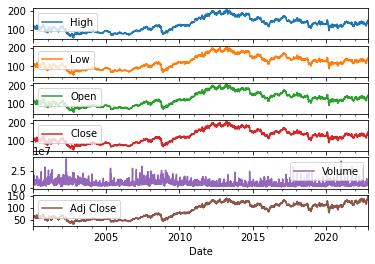

In [4]:
plot_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
# plot_cols = ['High', 'Low', 'Open', 'Close', 'Adj Close']
plot_features = panel_data[plot_cols]
plot_features.index = date
_ = plot_features.plot(subplots=True)


In [5]:
panel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,8360.0,1.251779e+02,3.455655e+01,5.420650e+01,9.485899e+01,1.227151e+02,1.479159e+02,2.064053e+02
Low,8360.0,1.230221e+02,3.444636e+01,5.163480e+01,9.281549e+01,1.208031e+02,1.461855e+02,2.048757e+02
Open,8360.0,1.240827e+02,3.449862e+01,5.224665e+01,9.370937e+01,1.217113e+02,1.472036e+02,2.059082e+02
Close,8360.0,1.241142e+02,3.451697e+01,5.264819e+01,9.364245e+01,1.218356e+02,1.470650e+02,2.063098e+02
Volume,8360.0,6.305338e+06,3.515975e+06,1.074765e+06,3.970407e+06,5.418300e+06,7.612971e+06,4.310284e+07
Adj Close,8360.0,8.793413e+01,3.089049e+01,3.087132e+01,5.613797e+01,9.467731e+01,1.155168e+02,1.491000e+02


In [6]:
# panel_data.drop(columns=['Volume'], axis=1, inplace=True)
# panel_data

In [7]:
# Calculate percentage change

panel_data['Open'] = panel_data['Open'].pct_change()
panel_data['High'] = panel_data['High'].pct_change()
panel_data['Low'] = panel_data['Low'].pct_change()
panel_data['Close'] = panel_data['Close'].pct_change()
panel_data['Adj Close'] = panel_data['Adj Close'].pct_change()

panel_data['Volume'] = panel_data['Volume'].pct_change()
panel_data.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values
panel_data

,High,Low,Open,Close,Volume,Adj Close
1,-0.012931,-0.008939,0.013897,-0.033944,-0.204867,-0.033945
2,0.045852,0.011274,-0.009320,0.035137,0.547583,0.035137
3,-0.006785,0.012263,0.044826,-0.017241,-0.373928,-0.017242
4,-0.008408,-0.025330,-0.006356,-0.004386,0.487312,-0.004386
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
8355,0.014571,0.018778,0.021965,0.010610,0.178477,0.010610
8356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8358,-0.002562,0.003495,0.006755,-0.006502,-0.253986,-0.006502


In [8]:
# Normalize price columns
min_return = min(panel_data[['Open', 'High', 'Low', 'Close']].min(axis=0)) # , 'Adj Close'
max_return = max(panel_data[['Open', 'High', 'Low', 'Close']].max(axis=0)) # , 'Adj Close'

# Min-max normalize price columns (0-1 range)
panel_data['Open'] = (panel_data['Open'] - min_return) / (max_return - min_return)
panel_data['High'] = (panel_data['High'] - min_return) / (max_return - min_return)
panel_data['Low'] = (panel_data['Low'] - min_return) / (max_return - min_return)
panel_data['Close'] = (panel_data['Close'] - min_return) / (max_return - min_return)
# panel_data['Adj Close'] = (panel_data['Adj Close'] - min_return) / (max_return - min_return)


# Normalize volume column
min_volume = panel_data['Volume'].min(axis=0)
max_volume = panel_data['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
panel_data['Volume'] = (panel_data['Volume'] - min_volume) / (max_volume - min_volume)


In [9]:
# Create training, validation and test split
times = sorted(panel_data.index.values)
last_10pct = sorted(panel_data.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(panel_data.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = panel_data[(panel_data.index < last_20pct)]  # Training data are 80% of total data
df_val = panel_data[(panel_data.index >= last_20pct) & (panel_data.index < last_10pct)]
df_test = panel_data[(panel_data.index >= last_10pct)]

In [10]:
# # Remove date column
# df_train.drop(columns=['Date'], inplace=True)
# df_val.drop(columns=['Date'], inplace=True)
# df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print(f'Training data shape: {train_data.shape}')
print(f'Validation data shape: {val_data.shape}')
print(f'Test data shape: {test_data.shape}')

Training data shape: (6688, 6)
Validation data shape: (836, 6)
Test data shape: (835, 6)


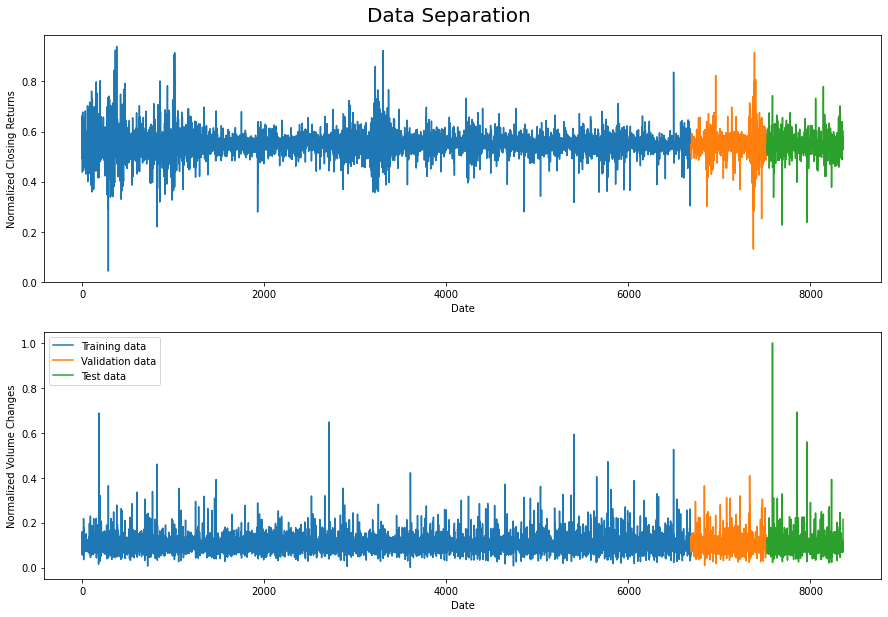

In [11]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')

In [13]:
# Hyperparameters
seq_len = 128

In [14]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(6560, 128, 6) (6560,)
(708, 128, 6) (708,)


In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable

In [ ]:
def create_model():
  in_seq = Input(shape = (seq_len, 5))
      
  x = Bidirectional(LSTM(128, return_sequences=True))(in_seq)
  x = Bidirectional(LSTM(128, return_sequences=True))(x)
  x = Bidirectional(LSTM(64, return_sequences=True))(x) 
          
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPooling1D()(x)
  conc = concatenate([avg_pool, max_pool])
  conc = Dense(64, activation="relu")(conc)
  out = Dense(1, activation="linear")(conc)      

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])    
  return model

model = create_model()

#model.summary()
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
callback = tf.keras.callbacks.ModelCheckpoint('Bi-LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

model.fit(X_train, y_train,
              batch_size=2048,
              verbose=2,
              callbacks=[callback],
              epochs=200,
              #shuffle=True,
              validation_data=(X_val, y_val),)    

model = tf.keras.models.load_model('/content/Bi-LSTM.hdf5')





In [ ]:


class LSTM(nn.Module):

    # define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, lstm_units, hidden_dim , num_classes, lstm_layers,
                 bidirectional, dropout, pad_index, batch_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_index)
        self.lstm = nn.LSTM(embedding_dim,
                            lstm_units,
                            num_layers=lstm_layers,
                            bidirectional=bidirectional,
                            batch_first=True)
        num_directions = 2 if bidirectional else 1
        self.fc1 = nn.Linear(lstm_units * num_directions, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.lstm_layers = lstm_layers
        self.num_directions = num_directions
        self.lstm_units = lstm_units


    def init_hidden(self, batch_size):
        h, c = (Variable(torch.zeros(self.lstm_layers * self.num_directions, batch_size, self.lstm_units)),
                Variable(torch.zeros(self.lstm_layers * self.num_directions, batch_size, self.lstm_units)))
        return h, c

    def forward(self, text, text_lengths):
        batch_size = text.shape[0]
        h_0, c_0 = self.init_hidden(batch_size)

        embedded = self.embedding(text)
        packed_embedded = pack_padded_sequence(embedded, text_lengths, batch_first=True)
        output, (h_n, c_n) = self.lstm(packed_embedded, (h_0, c_0))
        output_unpacked, output_lengths = pad_packed_sequence(output, batch_first=True)
        out = output_unpacked[:, -1, :]
        rel = self.relu(out)
        dense1 = self.fc1(rel)
        drop = self.dropout(dense1)
        preds = self.fc2(drop)
        return preds

In [ ]:
###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

In [ ]:
###############################################################################
'''Display results'''

fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Bi-LSTM Model", fontsize=22)
st.set_y(1.02)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='IBM Closing Returns')
ax11.plot(train_pred, color='yellow', linewidth=3, label='Predicted IBM Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(val_pred, color='yellow', linewidth=3, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(test_pred, color='yellow', linewidth=3, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')

plt.tight_layout()
plt.legend(loc='best')